# Machine Learning - Supervised Learning
## Unit 3. Basic Classification Techniques
### Lecturer: Tai Le Quy
18.8.2023

Thank Prof. Dr. Christian Müller-Kett for the code

## 1. K-Nearest Neighbor

In [1]:
# %% load packages
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [2]:
# %% load data
#The dataset contains two classes of tumors: 212 malignant tumors and 357 benign tumors. There are 30 features in the dataset
#The label must be categorically coded so that it can be interpreted by the model (i.e., malignant=0 and benign=1). 
#For simplicity, we will only focus on three random features from those available
dataset = load_breast_cancer()
X = pd.DataFrame(dataset.data,columns=dataset.feature_names)
X = X[['mean smoothness', 'mean concavity', 'radius error']]
y = pd.Categorical.from_codes(dataset.target, dataset.target_names)
y = pd.get_dummies(y, drop_first=True)

In [3]:
#We split the dataset into a training and a test set with the help of scikit-learns train_test_split module. 
#By default, the module takes 25 percent of the data for testing.
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [4]:
#We can now initialize and train an instance of the k-nearest neighbor algorithm with a
#value of k=4. We choose the Manhattan distance as the distance metric.
knn = KNeighborsClassifier(n_neighbors=4, metric='manhattan')
knn.fit(X_train, y_train.values.ravel())

KNeighborsClassifier(metric='manhattan', n_neighbors=4)

In [5]:
#In the next step, we apply the trained model to the test data and generate predictions
y_pred = knn.predict(X_test)

In [6]:
#To evaluate the model, we generate the confusion matrix.
print(confusion_matrix(y_test, y_pred))

[[44  7]
 [18 74]]


In [7]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.71      0.86      0.78        51
           1       0.91      0.80      0.86        92

    accuracy                           0.83       143
   macro avg       0.81      0.83      0.82       143
weighted avg       0.84      0.83      0.83       143



In [8]:
#calculate accuracy
accuracy_score(y_test, y_pred)

0.8251748251748252

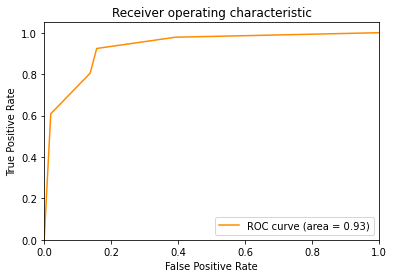

In [9]:
#Plot the ROC curve
from sklearn.metrics import roc_curve, auc
y_score = knn.predict_proba(X_test)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_score[:,1])
roc_auc = auc(false_positive_rate, true_positive_rate)

%matplotlib inline

plt.figure()
plt.plot(false_positive_rate, true_positive_rate, color='darkorange',label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

### Using cross-validation for parameter tuning

In [10]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score #for cross evaluation

In [11]:
#Iris data set
dataset=pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data",header=None)

In [12]:
X = dataset.iloc[:, 0:4].values
Y = dataset.iloc[:, 4].values
#encoding
le = LabelEncoder()
Y = le.fit_transform(Y)

#split data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [13]:
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [14]:
# creating list of K for KNN
k_list = list(range(1,100,2))
# creating list of cv scores
cv_scores = []

# perform 10-fold cross validation
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, Y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

<Figure size 432x288 with 0 Axes>

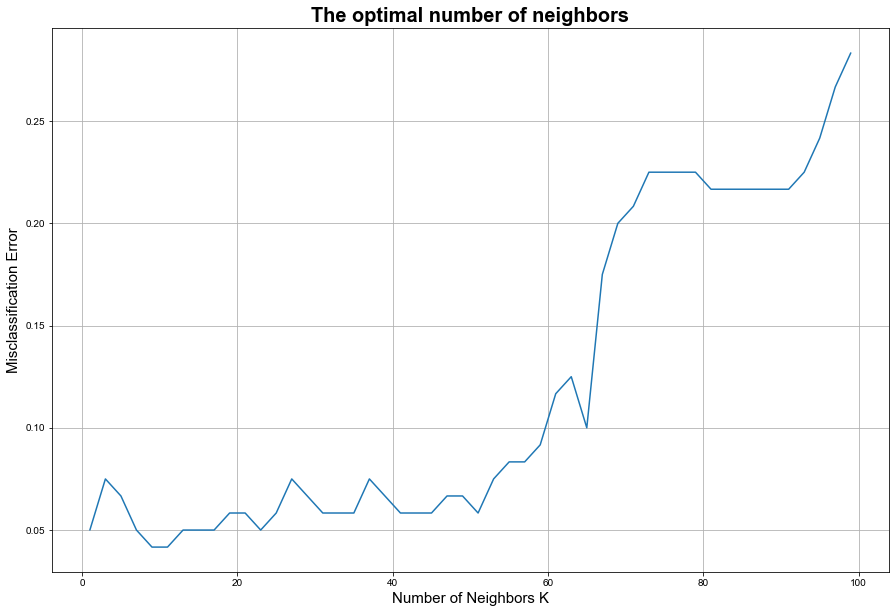

In [15]:
import seaborn as sns
%matplotlib inline

# changing to misclassification error
MSE = [1 - x for x in cv_scores]

plt.figure()
plt.figure(figsize=(15,10))
plt.title('The optimal number of neighbors', fontsize=20, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=15)
plt.ylabel('Misclassification Error', fontsize=15)
sns.set_style("ticks")
plt.plot(k_list, MSE)
plt.grid()
plt.show()

In [16]:
# finding best k
best_k = k_list[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d." % best_k)

The optimal number of neighbors is 9.


## 2. Naïve Bayes

In [1]:
# %% load packages
import pandas as pd
from sklearn.naive_bayes import GaussianNB

In [2]:
# %% load data
exam_data = pd.read_csv('bayes_data.csv', sep=';')
print(exam_data.head(10))

   Student No. Invested effort  Passed last exam  Passed
0            1             low                 0       0
1            2          medium                 1       1
2            3            high                 1       1
3            4             low                 0       0
4            5            high                 1       1
5            6            high                 1       1
6            7          medium                 1       1
7            8          medium                 1       0
8            9            high                 1       1
9           10          medium                 0       1


In [3]:
# %% prepare the data
X = exam_data.drop(columns=['Passed'])
y = exam_data['Passed']
X = pd.get_dummies(X)

In [4]:
# %% we initialize and train an instance of the Gaussian naïve Bayes.
model = GaussianNB()
model.fit(X, y)

GaussianNB()

In [6]:
# %% We load and prepare the test data.
test_data = pd.read_csv('bayes_test_data.csv', sep=';')
X_test = test_data.drop(columns=['Passed'])
y_test = test_data['Passed']
X_test = pd.get_dummies(X_test)

In [7]:
X_test

,Student No.,Passed last exam,Invested effort_high,Invested effort_low,Invested effort_medium
0,11,0,0,1,0
1,12,0,0,0,1
2,13,1,1,0,0


In [8]:
# %% generate and print the predictions
y_pred = model.predict(X_test)
print('Prediction results:')
print(y_pred)

Prediction results:
[0 1 1]


### Apply Gaussian NB with Iris dataset

In [23]:
import pandas as pd

data =pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", header=None)
X = data.iloc[:, :4]
y = data.iloc[:, 4]

In [24]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split


# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train, y_train)

y_predicts = clf.predict(X_test)
print('----------------- Confusion Matrix -----------------')
print(confusion_matrix(y_test, y_predicts))
print('----------------- Classification Report -----------------')
print(classification_report(y_test, y_predicts))

----------------- Confusion Matrix -----------------
[[ 9  0  0]
 [ 0 12  1]
 [ 0  1  7]]
----------------- Classification Report -----------------
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       0.92      0.92      0.92        13
 Iris-virginica       0.88      0.88      0.88         8

       accuracy                           0.93        30
      macro avg       0.93      0.93      0.93        30
   weighted avg       0.93      0.93      0.93        30

